In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [10]:
data= pd.read_csv ("salary.csv")

In [11]:
data

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


In [13]:
data.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


In [14]:
data.isnull().sum()

YearsExperience    0
Salary             0
dtype: int64

In [15]:
data[data.duplicated()].shape

(0, 2)

In [16]:
data[data.duplicated()]

,YearsExperience,Salary


{'whiskers': [<matplotlib.lines.Line2D at 0x7de54d64faf0>,
 'caps': [<matplotlib.lines.Line2D at 0x7de54d798c10>,
 'boxes': [<matplotlib.lines.Line2D at 0x7de54d64f850>,
 'medians': [<matplotlib.lines.Line2D at 0x7de54d6a0070>,
 'fliers': [<matplotlib.lines.Line2D at 0x7de54d6a0310>,
 'means': []}

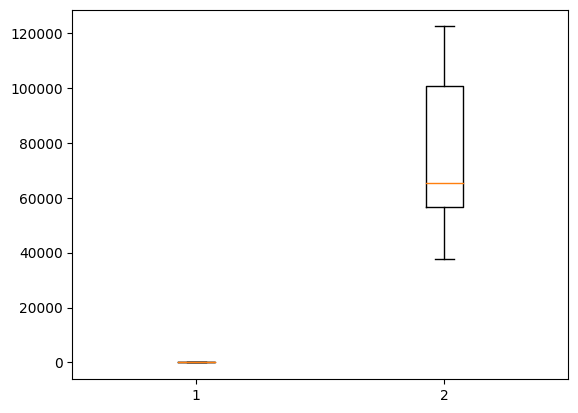

In [17]:
plt.boxplot(data)

In [18]:
data.corr()

,YearsExperience,Salary
YearsExperience,1.000000,0.978242
Salary,0.978242,1.000000


<Axes: xlabel='Years_Experience', ylabel='salary'>

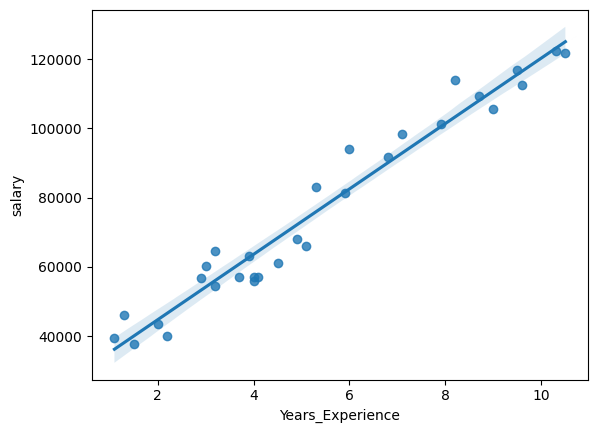

In [48]:
sns.regplot(x=data['Years_Experience'],y=data['salary'])

<Axes: >

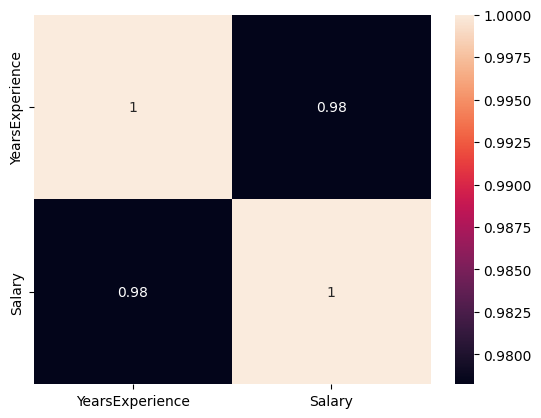

In [26]:
sns.heatmap(data.corr(),annot=True)

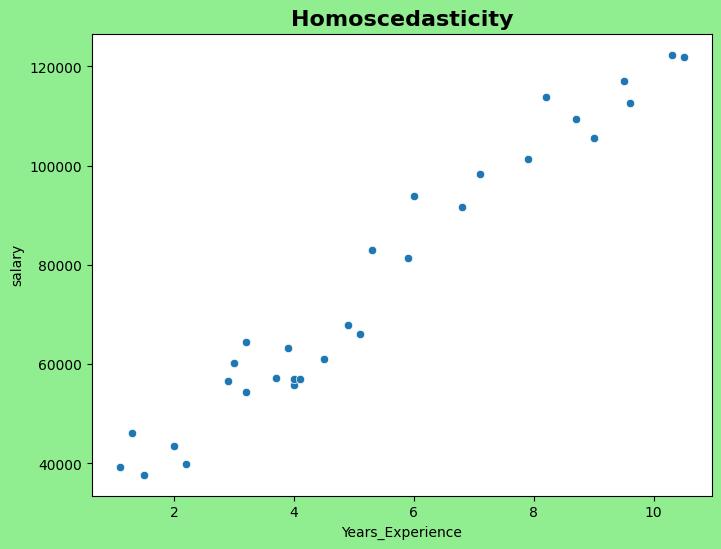

In [49]:
plt.figure(figsize = (8,6), facecolor = 'lightgreen')
sns.scatterplot(x = data['Years_Experience'], y = data['salary'])
plt.title('Homoscedasticity', fontweight = 'bold', fontsize = 16)
plt.show()


In [28]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df1=scaler.fit_transform(data)
scaled_df=pd.DataFrame(df1,columns=data.columns)
scaled_df.head()

,YearsExperience,Salary
0,0.000000,0.019041
1,0.021277,0.100094
2,0.042553,0.000000
3,0.095745,0.068438
4,0.117021,0.025514


In [29]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df2 = scaler.fit_transform(data)
scaled_df = pd.DataFrame(df2, columns = data.columns)
scaled_df.head()

,YearsExperience,Salary
0,-1.510053,-1.360113
1,-1.438373,-1.105527
2,-1.366693,-1.419919
3,-1.187494,-1.204957
4,-1.115814,-1.339781


In [30]:
data = data.rename({'YearsExperience':'Years_Experience','Salary':'salary'},axis=1)
data

,Years_Experience,salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


In [31]:
import statsmodels.formula.api as smf
model = smf.ols(formula ='salary~Years_Experience', data = data).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 salary   R-squared:                       0.957
Model:                            OLS   Adj. R-squared:                  0.955
Method:                 Least Squares   F-statistic:                     622.5
Date:                Wed, 10 Apr 2024   Prob (F-statistic):           1.14e-20
Time:                        05:15:40   Log-Likelihood:                -301.44
No. Observations:                  30   AIC:                             606.9
Df Residuals:                      28   BIC:                             609.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept         2.579e+04   2273.053     11.347      0.000    2.11e+04    3.04e+04
Years_Experience  9449.9623    378.755     24.950      0.000    8674.119    1.02e+04
==============================================================================
Omnibus:                        2.140   Durbin-Watson:                   1.648
Prob(Omnibus):                  0.343   Jarque-Bera (JB):                1.569
Skew:                           0.363   Prob(JB):                        0.456
Kurtosis:                       2.147   Cond. No.                         13.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Square Root transformation on data

In [32]:
model1 = smf.ols('np.sqrt(salary)~np.sqrt(Years_Experience)', data = data).fit()
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        np.sqrt(salary)   R-squared:                       0.942
Model:                            OLS   Adj. R-squared:                  0.940
Method:                 Least Squares   F-statistic:                     454.3
Date:                Wed, 10 Apr 2024   Prob (F-statistic):           7.58e-19
Time:                        05:15:52   Log-Likelihood:                -116.52
No. Observations:                  30   AIC:                             237.0
Df Residuals:                      28   BIC:                             239.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept                   103.5680      8.178     12.663      0.000      86.815     120.321
np.sqrt(Years_Experience)    75.6269      3.548     21.315      0.000      68.359      82.895
==============================================================================
Omnibus:                        0.924   Durbin-Watson:                   1.362
Prob(Omnibus):                  0.630   Jarque-Bera (JB):                0.801
Skew:                           0.087   Prob(JB):                        0.670
Kurtosis:                       2.219   Cond. No.                         9.97
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Cuberoot transformation on Data

In [33]:
model2 = smf.ols('np.cbrt(salary)~np.cbrt(Years_Experience)',data=data).fit()
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        np.cbrt(salary)   R-squared:                       0.932
Model:                            OLS   Adj. R-squared:                  0.930
Method:                 Least Squares   F-statistic:                     386.5
Date:                Wed, 10 Apr 2024   Prob (F-statistic):           6.37e-18
Time:                        05:16:15   Log-Likelihood:                -50.589
No. Observations:                  30   AIC:                             105.2
Df Residuals:                      28   BIC:                             108.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept                    16.6603      1.300     12.811      0.000      13.996      19.324
np.cbrt(Years_Experience)    14.8963      0.758     19.659      0.000      13.344      16.448
==============================================================================
Omnibus:                        0.386   Durbin-Watson:                   1.229
Prob(Omnibus):                  0.824   Jarque-Bera (JB):                0.535
Skew:                           0.070   Prob(JB):                        0.765
Kurtosis:                       2.361   Cond. No.                         12.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Log transformation on Data

In [34]:
model3 = smf.ols('np.log(salary)~np.log(Years_Experience)', data = data).fit()
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         np.log(salary)   R-squared:                       0.905
Model:                            OLS   Adj. R-squared:                  0.902
Method:                 Least Squares   F-statistic:                     267.4
Date:                Wed, 10 Apr 2024   Prob (F-statistic):           7.40e-16
Time:                        05:16:21   Log-Likelihood:                 23.209
No. Observations:                  30   AIC:                            -42.42
Df Residuals:                      28   BIC:                            -39.61
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept                   10.3280      0.056    184.868      0.000      10.214      10.442
np.log(Years_Experience)     0.5621      0.034     16.353      0.000       0.492       0.632
==============================================================================
Omnibus:                        0.102   Durbin-Watson:                   0.988
Prob(Omnibus):                  0.950   Jarque-Bera (JB):                0.297
Skew:                           0.093   Prob(JB):                        0.862
Kurtosis:                       2.549   Cond. No.                         5.76
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

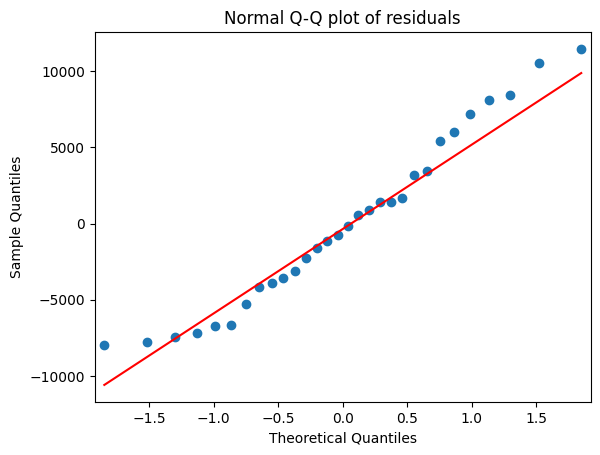

In [35]:
import statsmodels.api as sm
qqplot=sm.qqplot(model.resid,line= 'q')
plt.title("Normal Q-Q plot of residuals")
plt.show()

In [ ]:
np.where(model.resid>10)

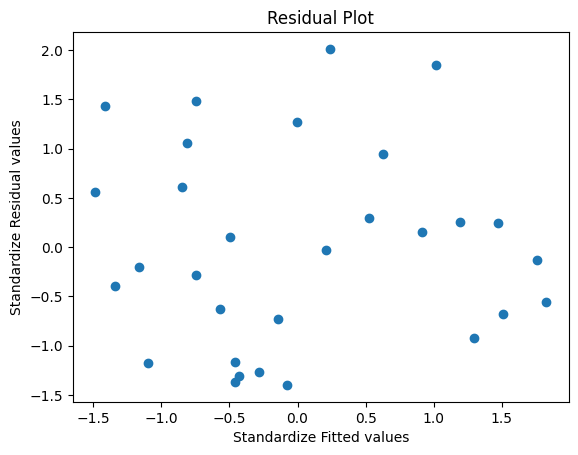

In [36]:
def get_standardize_values( vals):
  return (vals - vals.mean())/vals.std()
plt.scatter(get_standardize_values(model.fittedvalues), get_standardize_values(model.resid))
plt.ylabel('Standardize Residual values')
plt.xlabel('Standardize Fitted values')
plt.title('Residual Plot')
plt.show()

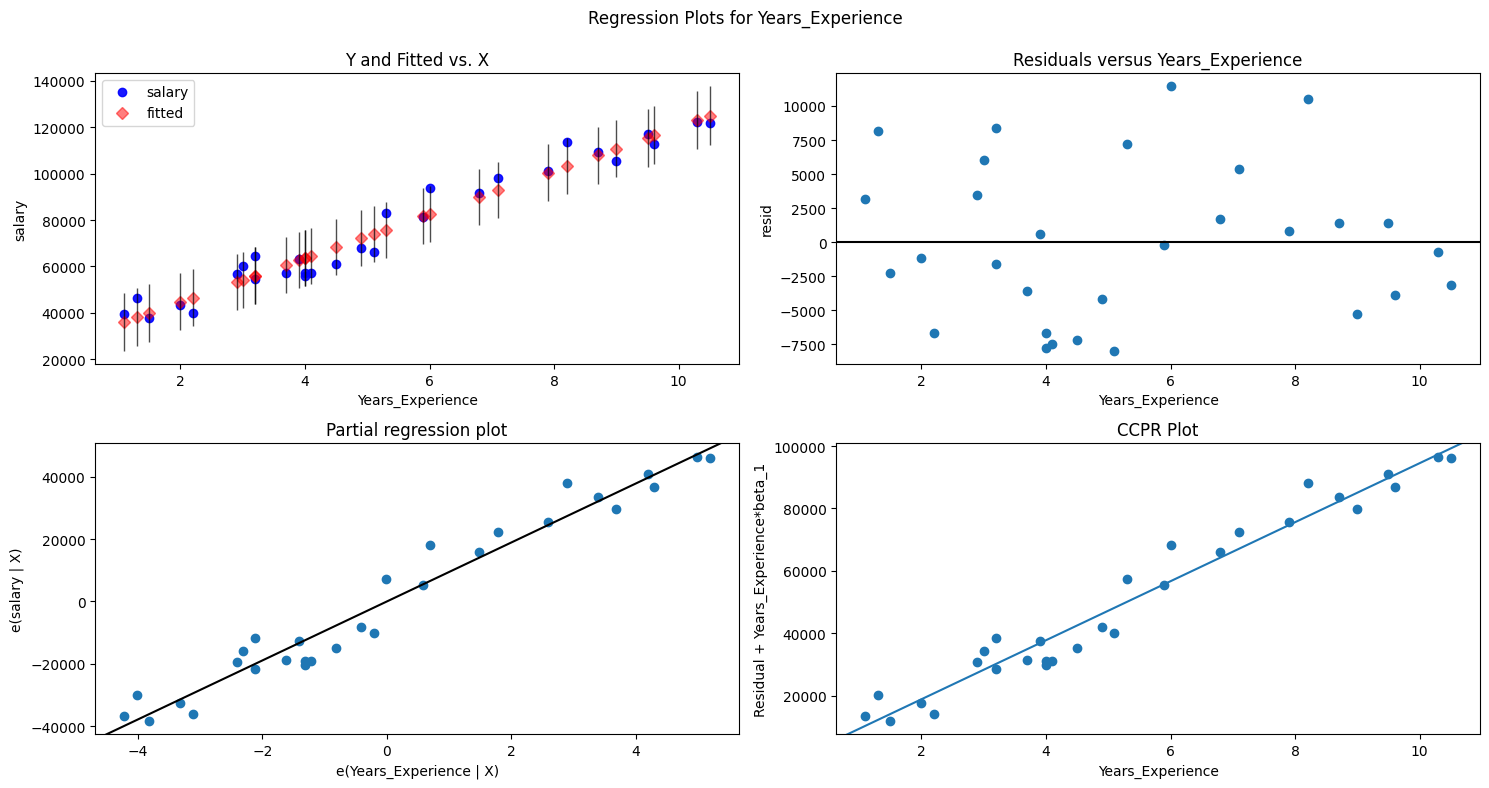

In [37]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "Years_Experience", fig=fig)
plt.show()

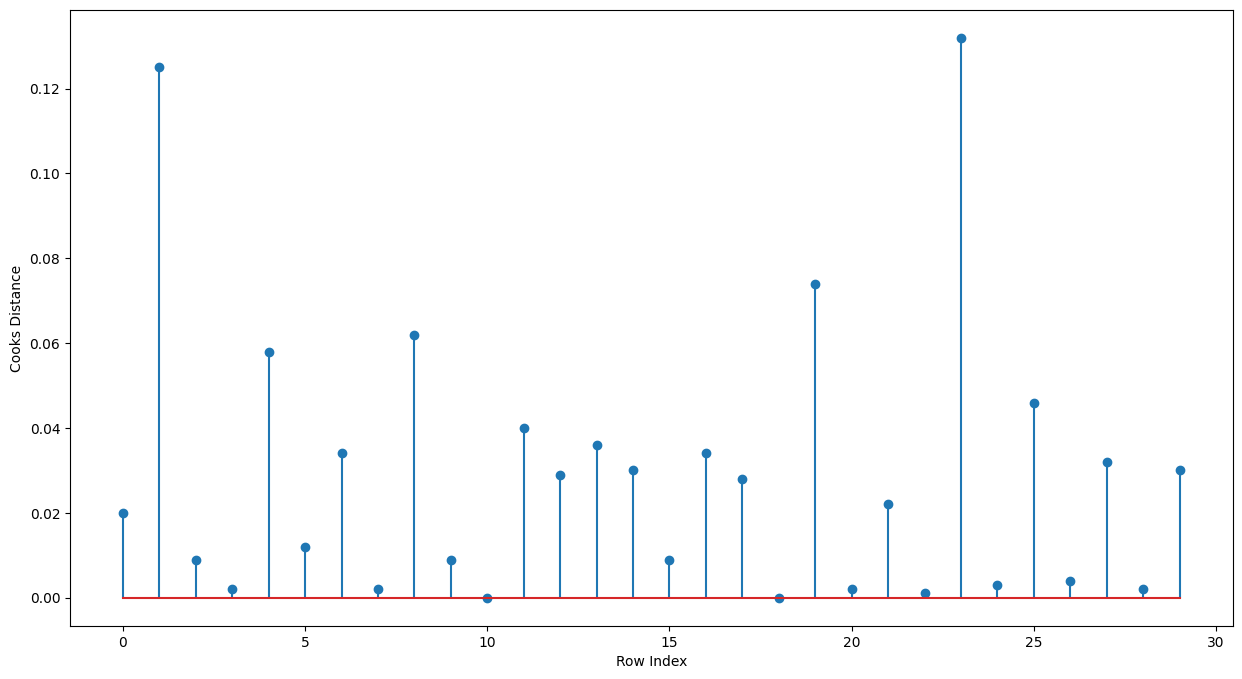

In [38]:
model_influence = model.get_influence()
(c,_)= model_influence.cooks_distance
fig = plt.subplots(figsize = (15,8))
plt.stem(np.arange(len(data)),np.round(c,3))
plt.xlabel('Row Index')
plt.ylabel('Cooks Distance')
plt.show()

In [39]:
(np.argmax(c),np.max(c))

(23, 0.13175452313135258)

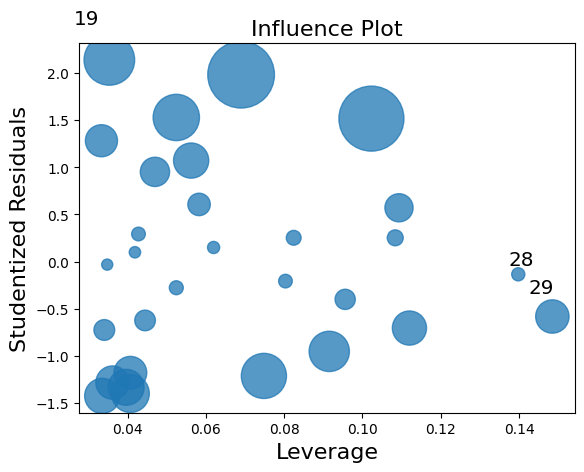

In [40]:
from statsmodels.graphics.regressionplots import influence_plot
influence_plot(model)
plt.show()

In [41]:
k = data.shape[1]
n = data.shape[0]
leverage_cutoff = 3*(k+1)/n
leverage_cutoff

0.3

In [42]:
final_ml_v=smf.ols(formula = 'salary~Years_Experience',data=data).fit()
(final_ml_v.rsquared,final_ml_v.aic)


(0.9569566641435086, 606.882316930432)

In [45]:
newdata = pd.Series([5,10])

In [44]:
data_prend = pd.DataFrame(newdata , columns = ['Years_Experience'])
data_prend

,Years_Experience
0,5
1,10


In [46]:
model.predict(data_prend)

0     73042.011806
1    120291.823413
dtype: float64